In [29]:
import sys
import mysql.connector
from mysql.connector import (connection)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.dates as dates
%matplotlib inline

from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.layouts import column, row, WidgetBox
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure
from bokeh.palettes import Spectral7 
from IPython.display import clear_output,display
from bokeh.io import output_notebook, show
output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [2]:
mysqldb = mysql.connector.connect(host="127.0.0.1", user="root", password="pinkftw94@", database="Project")

In [3]:
try:
    cursor = mysqldb.cursor()
except:
    if err.errno == mysql.connector.errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DV_ERROR:
        print("Database does not exist")
    else:
        print(err)

In [23]:
# Function to plot the correlation Matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Employee Compensation"
    
    # drop columns with NaN
    df = df.dropna('columns') 
    
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    
    if df.shape[1] < 2:
        print('No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')    
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Employee Compensation', fontsize=15)
    plt.show()

<div style="background-color:pink; text-align:center; vertical-align: middle; padding:40px 0;"><h1><center>Python Project - Group 16</center></h1>
<h1><center>SAN FRANCISCO EMPLOYEE COMPENSATION</center></h1>

<h3><center>Freya Genesis D Mello, Dithya Sridharan, Krina Joshi</center></h3></div>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">

#### The dataset studies the Employee Compensation for Employees across all Job Organisations for fiscal years 2013 to 2017. Among the six organisations identified, it was observed that the number of employees, despite being high, have a comparatively lower compensation than the other organisations. So we are analysing the employee compensation distribution along the hierarchy - organisations, departments, and jobs.</div>

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2>Correlation Matrix for Employee Compensation</h2>

### Total Compensation = Total Salary + Total Benefits

### Salary > Benefits</div>

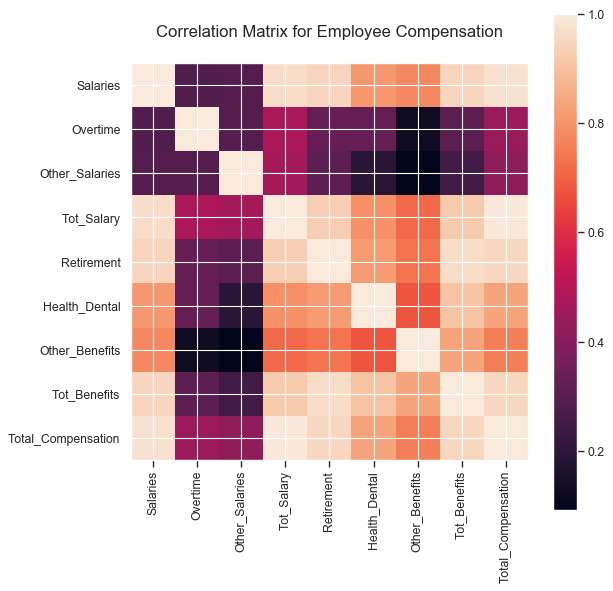

In [24]:
# Correlation Matrix

cursor = mysqldb.cursor(buffered=True)
AllData = []
queryDepts = ("SELECT Salaries, Overtime, Other_Salaries, Tot_Salary, Retirement, Health_Dental, Other_Benefits, Tot_Benefits, Total_Compensation from Project.EmpComp")
cursor.execute(queryDepts)
columns = cursor.column_names
AllDataDF = pd.DataFrame(cursor.fetchall())

AllDataDF.columns = columns

plotCorrelationMatrix(AllDataDF, 8)

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2>Breakdown along the hierarchy

## Organisations
#   |
### Departments
#   |
#### Jobs

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2>The percentage of Employees per Organisation

#### Public Works: 28.5
#### Community Health           : 22
#### Public Protection          : 16.7
#### Human Welfare & Neighborhood Development: 11.7
#### Culture & Recreation      : 10.9
#### General Administration & Finance: 9.5
#### General City Responsibixlities : 0.2

In [14]:
x = {
    'Public Works': 28.5,
    'Community Health': 22.6,
    'Public Protection': 16.7,
    'Human Welfare & Neighborhood Development': 11.7,
    'Culture & Recreation': 10.9,
    'General Administration & Finance': 9.5,
    'General City Responsibixlities ': 0.2
    }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'org'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p = figure(plot_height=700,plot_width=700, title="Employee Percentage in each Organisation", toolbar_location=None,
           tools="hover", tooltips="@org: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='org', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2> Number of Jobs per Organisation categorised under HIGH and LOW Compensation

#### Public Works > Public Protection > Community Health 

#### Public Works has highest number of Jobs - LOW and HIGH
#### Number of LOW Compensation Jobs: Community Health >> Public Protection 
### Hence Community Health has lesser Compensation than Public Protection

#### Other Orgs - Culture & Recreation, Human Welfare, General Administration have more number of LOW Compensation Jobs than HIGH Compensation

#### General City Responsibilities has no HIGH Compensation Jobs

Text(0.5,1,'Counts of Jobs among different Organisation Groups categorising High and Low Compensation Levels')

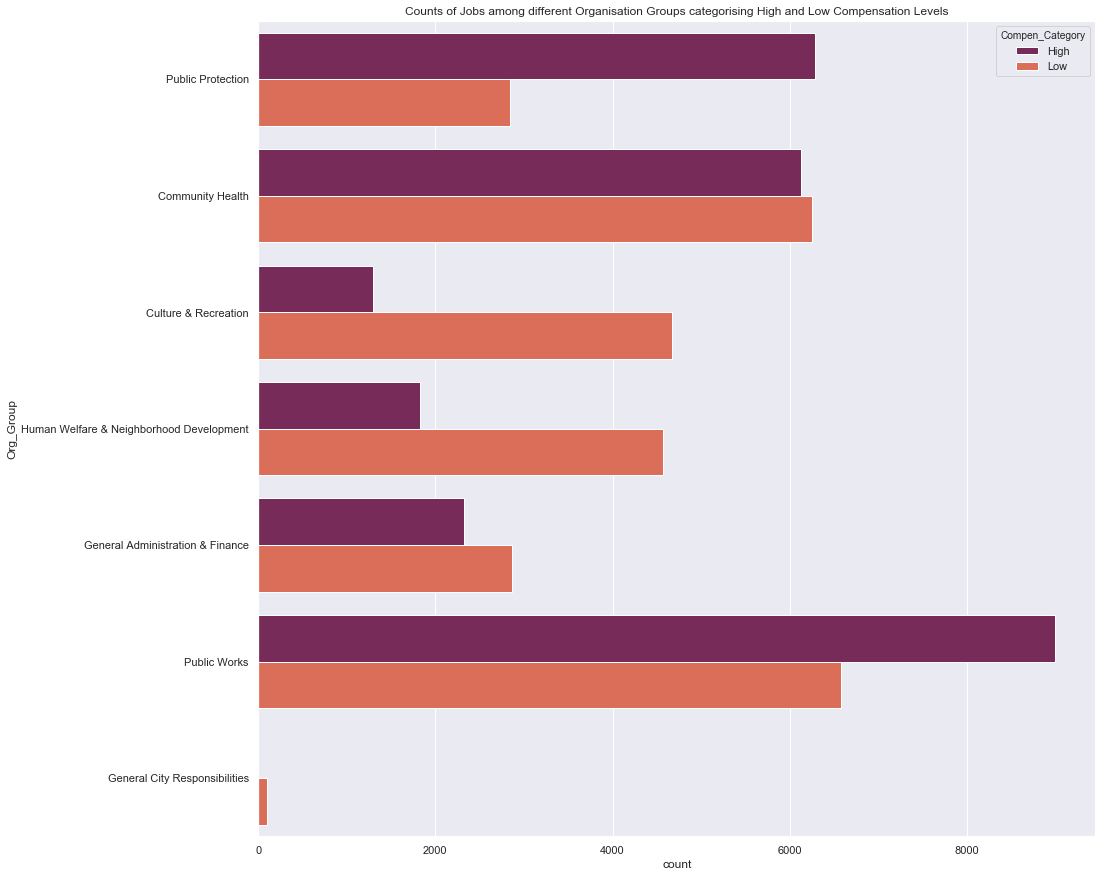

In [15]:
AllOJTC = pd.read_sql("SELECT Org_Group, Job, Total_Compensation from Project.EmpComp",mysqldb)

Mean_Compensation = np.average(AllOJTC['Total_Compensation'])

AllOJTC.loc[AllOJTC['Total_Compensation'] >= Mean_Compensation, 'Compen_Category'] = "High"
AllOJTC.loc[AllOJTC['Total_Compensation'] < Mean_Compensation, 'Compen_Category'] = "Low"

other = AllOJTC.groupby(['Compen_Category', 'Org_Group'], as_index=False).size().reset_index(name='Counts')

# Jobs with High Compensation per org vs # Jobs with Low Compensation per org
sns.set(style="darkgrid")
ax1 = plt.subplots(1,1,figsize=(15,15) )
ax101 = sns.countplot(y="Org_Group", hue="Compen_Category", data=AllOJTC, palette="rocket")
plt.title("Counts of Jobs among different Organisation Groups categorising High and Low Compensation Levels")


<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;"> <h2>Comparison between total compensation for every fiscal year

#### Steep increase in Total compensation from 2016 - 2017 compared to other fiscal years 2013, 2014, 2015.
#### Highest Compensation observed in Public Works
#### Public Works > Public Protection > Community Health

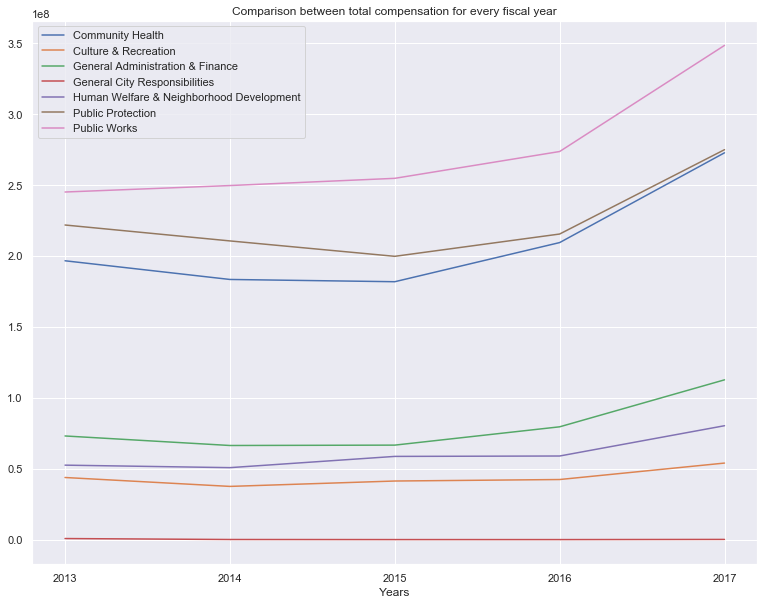

In [17]:
# A comparison between total salaries and total compensation and total benefits for every fiscal year
# All the fiscal years
Years = [2013, 2014, 2015, 2016, 2017]

mysqldb = mysql.connector.connect(host="127.0.0.1", user="root", password="pinkftw94@", database="Project")

AllSBC = pd.read_sql("SELECT Years, Org_Group, sum(Tot_Salary) AS Tot_Salary, sum(Tot_Benefits) AS Tot_Benefits, sum(Total_Compensation) AS Total_Compensation from Project.EmpComp GROUP BY Years, Org_Group ORDER BY 1,2",mysqldb)

AllSBC.set_index("Years")

AllSBC['Year'] = pd.DatetimeIndex(AllSBC['Years']).year

unstacked = AllSBC.pivot(index = "Years", columns = "Org_Group", values = "Total_Compensation")

AllSBC['Year'] = pd.DatetimeIndex(AllSBC['Years']).year

unstacked.index = pd.to_datetime(unstacked.index)

ax = unstacked.plot.line(figsize=([13,10]))
ax.plot()
plt.title("Comparison between total compensation for every fiscal year")
plt.legend(loc = "best")

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2> Breakdown along the hierarchy

## Organisations
# |
### Departments
# |
#### Jobs

In [36]:
orgvals = AllOrgs['Org_Group'].tolist()
compvals = AllOrgs['TotalComp'].tolist()

source = ColumnDataSource(data=dict(orgvals=orgvals, compvals=compvals, color=Spectral7))

p = figure(x_range=orgvals, plot_height=600,plot_width=1000, title="All Organisations", toolbar_location=None, tools="")
p.vbar(x='orgvals', top='compvals', width=0.9, color='color', legend="orgvals", source=source)
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = 315

show(p)

from bokeh.palettes import Spectral10

dept_vals = TopDepts['Dept'].tolist()
comp_vals = TopDepts['TotalComp'].tolist()

source = ColumnDataSource(data=dict(dept_vals=dept_vals, comp_vals=comp_vals, color=Spectral10))

p = figure(x_range=dept_vals, plot_height=600,plot_width=1000, title="Top 10% Departments", toolbar_location=None, tools="")
p.vbar(x='dept_vals', top='comp_vals', width=0.9, color='color', legend="dept_vals", source=source)
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = 315


show(p)

from bokeh.palettes import Spectral11
from bokeh.palettes import inferno

j_vals = TopJobs['Job'].tolist()
comp_vals = TopJobs['TotalComp'].tolist()

source = ColumnDataSource(data=dict(j_vals=j_vals, comp_vals=comp_vals, color = inferno(17)))

p = figure(x_range=j_vals, plot_height=800,plot_width=1000, title="Top 10% Jobs", toolbar_location=None, tools="")
p.vbar(x='j_vals', top='comp_vals', width=0.9, color = 'color', legend="j_vals", source=source)
p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"
p.xaxis.major_label_orientation = 315

show(p)



<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2> List of Top Jobs

#### Highest Compensation observed in Public Works
#### Public Works > Public Protection > Community Health>Human Welfare & Neighborhood Development

In [20]:
TopJobs

,TotalSals,TotalBens,TotalComp,Job,Job_Fam,Dept,Org_Group
10,186892485.0,86262743.0,273155207.0,Transit Operator,Street Transit,MTA Municipal Transprtn Agncy,Public Works
23,185883623.0,61164796.0,247048410.0,Registered Nurse,Nursing,DPH Public Health,Community Health
3,131355131.0,36107198.0,167462314.0,Firefighter,Fire Services,FIR Fire Department,Public Protection
31,109197586.0,26518652.0,135716234.0,Police Officer 3,Police Services,POL Police,Public Protection
19,74769671.0,23996263.0,98765905.0,Police Officer,Police Services,POL Police,Public Protection
7,83403941.0,14003882.0,97407788.0,Special Nurse,Nursing,DPH Public Health,Community Health
15,74209374.0,22873045.0,97082404.0,Deputy Sheriff,Correction & Detention,SHF Sheriff,Public Protection
34,57556379.0,13499833.0,71056218.0,Sergeant 3,Police Services,POL Police,Public Protection
45,50712868.0,13947174.0,64660055.0,EMT/Paramedic/Firefighter,Fire Services,FIR Fire Department,Public Protection
41,44057658.0,11221647.0,55279290.0,Police Officer 2,Police Services,POL Police,Public Protection


In [37]:
from bokeh.palettes import inferno

org_list = [
    'Choose_Option',
    'Public Works',
    'Community Health',
    'Public Protection',
    'Human Welfare & Neighborhood Development'
]

def diss(abc):
    clear_output(wait = True)
    disss(abc)

def disss(abc):
    
    handler = FunctionHandler(modify_doc)
    app = Application(handler)
    show(app)
    make_plot(abc)

def make_plot(org_option):
    
    TopJobs_plot = TopJobs[TopJobs['Org_Group']==org_option]
    Tot_Sal = sum(TopJobs_plot['TotalSals'])
    Tot_Bens = sum(TopJobs_plot['TotalBens'])
    Tot_Comp = sum(TopJobs_plot['TotalComp'])
    counts = [Tot_Sal,Tot_Bens,Tot_Comp]
    option_list = ['Total Salary','Total Benefits','Total Compensation']
    p = figure(x_range=option_list, plot_height=500,plot_width=900, title=org_option)
    p.vbar(x=option_list, top=counts, width=0.9, color = inferno(3))
    p.xaxis.major_label_orientation = 360-45
    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    show(p)
       
def modify_doc(doc):
    
    
    def update(attr, old, new):
        
        org_option = option_selection.value
        print(org_option)
        diss(org_option)
    
    option_selection = Select(options=org_list)
    option_selection.on_change('value', update)
    
    initial_crimes = option_selection
    
    # Put controls in a single element
    controls = WidgetBox(option_selection)
    
    # Create a row layout
    layout = row(controls)
    
    # Make a tab with the layout
    doc.add_root(layout)
    
# Set up an application
handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)

In [22]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<div style="background-color:rgba(0, 0, 0, 0.0470588); text-align:center; vertical-align: middle; padding:40px 0;">
<h2>
    Future Scope:
    
    1. It helps get a better idea on how the compensation may vary 
    according to the trend observed from previous fiscal years.
    
    
    2. Depending on the observations and inferences from the employee
    counts and per organisation compensation amounts, it helps
    the younger generation choose their org of interest 
    depending on various factors like health and dental benefits, 
    retirement plans etc. 


<div style="background-color:PINK; text-align:center; vertical-align: middle; padding:40px 0;">
<h1>
    THANKYOU